Số lớp: 31 - ['Akshay Kumar', 'Alexandra Daddario', 'Alia Bhatt', 'Amitabh Bachchan', 'Andy Samberg', 'Anushka Sharma', 'Billie Eilish', 'Brad Pitt', 'Camila Cabello', 'Charlize Theron', 'Claire Holt', 'Courtney Cox', 'Dwayne Johnson', 'Elizabeth Olsen', 'Ellen Degeneres', 'Henry Cavill', 'Hrithik Roshan', 'Hugh Jackman', 'Jessica Alba', 'Kashyap', 'Lisa Kudrow', 'Margot Robbie', 'Marmik', 'Natalie Portman', 'Priyanka Chopra', 'Robert Downey Jr', 'Roger Federer', 'Tom Cruise', 'Vijay Deverakonda', 'Virat Kohli', 'Zac Efron']


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 141MB/s]
Epoch [1/10]: 100%|██████████| 33/33 [04:28<00:00,  8.14s/it, accuracy=29, loss=2.33]


Epoch 1/10: Train Loss=2.8355, Train Acc=28.96%, Test Loss=1.9680, Test Acc=57.44%


Epoch [2/10]: 100%|██████████| 33/33 [04:33<00:00,  8.29s/it, accuracy=85.8, loss=1.23]


Epoch 2/10: Train Loss=1.2865, Train Acc=85.81%, Test Loss=1.2465, Test Acc=76.45%


Epoch [3/10]: 100%|██████████| 33/33 [04:28<00:00,  8.14s/it, accuracy=95.5, loss=1.17]


Epoch 3/10: Train Loss=0.6080, Train Acc=95.53%, Test Loss=0.9517, Test Acc=80.17%


Epoch [4/10]: 100%|██████████| 33/33 [04:35<00:00,  8.35s/it, accuracy=98.6, loss=0.297]


Epoch 4/10: Train Loss=0.2902, Train Acc=98.64%, Test Loss=0.7250, Test Acc=85.12%


Epoch [5/10]: 100%|██████████| 33/33 [04:31<00:00,  8.23s/it, accuracy=99.7, loss=0.462]


Epoch 5/10: Train Loss=0.1494, Train Acc=99.71%, Test Loss=0.6176, Test Acc=88.43%


Epoch [6/10]: 100%|██████████| 33/33 [04:32<00:00,  8.25s/it, accuracy=99.8, loss=0.296]


Epoch 6/10: Train Loss=0.0982, Train Acc=99.81%, Test Loss=0.5953, Test Acc=88.84%


Epoch [7/10]: 100%|██████████| 33/33 [04:25<00:00,  8.04s/it, accuracy=100, loss=0.153]


Epoch 7/10: Train Loss=0.0609, Train Acc=100.00%, Test Loss=0.5329, Test Acc=90.08%


Epoch [8/10]: 100%|██████████| 33/33 [04:29<00:00,  8.16s/it, accuracy=100, loss=0.464]


Epoch 8/10: Train Loss=0.0430, Train Acc=100.00%, Test Loss=0.5113, Test Acc=89.67%


Epoch [9/10]: 100%|██████████| 33/33 [04:35<00:00,  8.36s/it, accuracy=100, loss=0.232]


Epoch 9/10: Train Loss=0.0386, Train Acc=100.00%, Test Loss=0.5010, Test Acc=90.08%


Epoch [10/10]: 100%|██████████| 33/33 [04:28<00:00,  8.14s/it, accuracy=100, loss=0.485]


Epoch 10/10: Train Loss=0.0311, Train Acc=100.00%, Test Loss=0.4719, Test Acc=90.08%


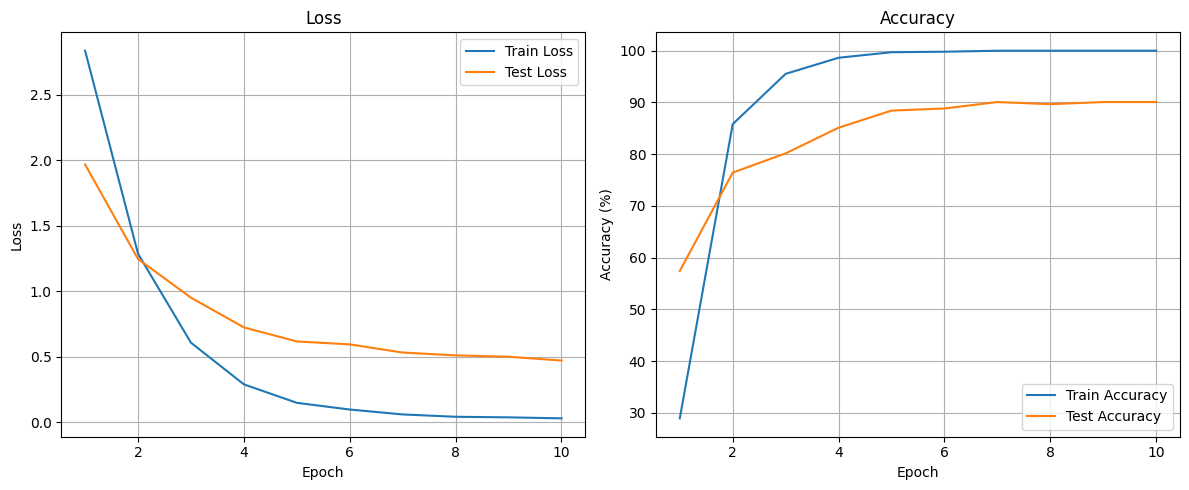

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from tqdm import tqdm
import matplotlib.pyplot as plt

# Thiết bị GPU nếu có
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Đường dẫn dữ liệu
data_dir = "/content/unzipped_folder/output_folder"


# Tham số huấn luyện
batch_size = 32
num_epochs = 10
learning_rate = 1e-4

# Tiền xử lý dữ liệu
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet dùng ảnh 224x224
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],   # Chuẩn ImageNet
                         [0.229, 0.224, 0.225])
])

# Tải dữ liệu train/test
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Số lớp (số người)
num_classes = len(train_dataset.classes)
print(f"Số lớp: {num_classes} - {train_dataset.classes}")

# Khởi tạo mô hình ResNet18 pretrained
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Thay lớp cuối cùng
model = model.to(device)

# Loss và Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Danh sách theo dõi loss và accuracy
train_loss_list, train_acc_list = [], []
test_loss_list, test_acc_list = [], []

# Vòng lặp huấn luyện
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]")

    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

        loop.set_postfix(loss=loss.item(), accuracy=100 * correct_train / total_train)

    epoch_loss = running_loss / total_train
    epoch_acc = 100 * correct_train / total_train
    train_loss_list.append(epoch_loss)
    train_acc_list.append(epoch_acc)

    # Đánh giá trên tập test
    model.eval()
    running_test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct_test += (preds == labels).sum().item()
            total_test += labels.size(0)

    test_loss = running_test_loss / total_test
    test_acc = 100 * correct_test / total_test
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs}: "
          f"Train Loss={epoch_loss:.4f}, Train Acc={epoch_acc:.2f}%, "
          f"Test Loss={test_loss:.4f}, Test Acc={test_acc:.2f}%")

# Vẽ biểu đồ Loss và Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_list, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_acc_list, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_acc_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy' )
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
VGGFace 2

In [ ]:
pip install facenet-pytorch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 695.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 475.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.

Using device: cpu
Số lớp: 31 - ['Akshay Kumar', 'Alexandra Daddario', 'Alia Bhatt', 'Amitabh Bachchan', 'Andy Samberg', 'Anushka Sharma', 'Billie Eilish', 'Brad Pitt', 'Camila Cabello', 'Charlize Theron', 'Claire Holt', 'Courtney Cox', 'Dwayne Johnson', 'Elizabeth Olsen', 'Ellen Degeneres', 'Henry Cavill', 'Hrithik Roshan', 'Hugh Jackman', 'Jessica Alba', 'Kashyap', 'Lisa Kudrow', 'Margot Robbie', 'Marmik', 'Natalie Portman', 'Priyanka Chopra', 'Robert Downey Jr', 'Roger Federer', 'Tom Cruise', 'Vijay Deverakonda', 'Virat Kohli', 'Zac Efron']


  0%|          | 0.00/107M [00:00<?, ?B/s]

Epoch [1/10]: 100%|██████████| 33/33 [03:59<00:00,  7.27s/it, acc=77.1, loss=0.837]


Epoch 1: Train Loss=1.5029, Train Acc=77.07%, Test Loss=0.4412, Test Acc=97.93%


Epoch [2/10]: 100%|██████████| 33/33 [04:05<00:00,  7.44s/it, acc=99.6, loss=1.06]


Epoch 2: Train Loss=0.2560, Train Acc=99.61%, Test Loss=0.1701, Test Acc=100.00%


Epoch [3/10]: 100%|██████████| 33/33 [03:57<00:00,  7.20s/it, acc=99.6, loss=0.212]


Epoch 3: Train Loss=0.1259, Train Acc=99.61%, Test Loss=0.1200, Test Acc=99.59%


Epoch [4/10]: 100%|██████████| 33/33 [04:00<00:00,  7.29s/it, acc=100, loss=0.175]


Epoch 4: Train Loss=0.0597, Train Acc=100.00%, Test Loss=0.0685, Test Acc=99.17%


Epoch [5/10]: 100%|██████████| 33/33 [03:57<00:00,  7.20s/it, acc=100, loss=0.0657]


Epoch 5: Train Loss=0.0357, Train Acc=100.00%, Test Loss=0.0473, Test Acc=100.00%


Epoch [6/10]: 100%|██████████| 33/33 [04:07<00:00,  7.49s/it, acc=100, loss=0.038]


Epoch 6: Train Loss=0.0262, Train Acc=100.00%, Test Loss=0.0483, Test Acc=99.59%


Epoch [7/10]: 100%|██████████| 33/33 [03:58<00:00,  7.24s/it, acc=100, loss=0.252]


Epoch 7: Train Loss=0.0211, Train Acc=100.00%, Test Loss=0.0368, Test Acc=100.00%


Epoch [8/10]: 100%|██████████| 33/33 [03:58<00:00,  7.22s/it, acc=99.5, loss=0.14]


Epoch 8: Train Loss=0.0413, Train Acc=99.51%, Test Loss=0.0657, Test Acc=99.59%


Epoch [9/10]: 100%|██████████| 33/33 [04:05<00:00,  7.42s/it, acc=100, loss=0.0582]


Epoch 9: Train Loss=0.0263, Train Acc=100.00%, Test Loss=0.0501, Test Acc=99.59%


Epoch [10/10]: 100%|██████████| 33/33 [03:58<00:00,  7.22s/it, acc=100, loss=0.0267]


Epoch 10: Train Loss=0.0164, Train Acc=100.00%, Test Loss=0.0473, Test Acc=98.76%


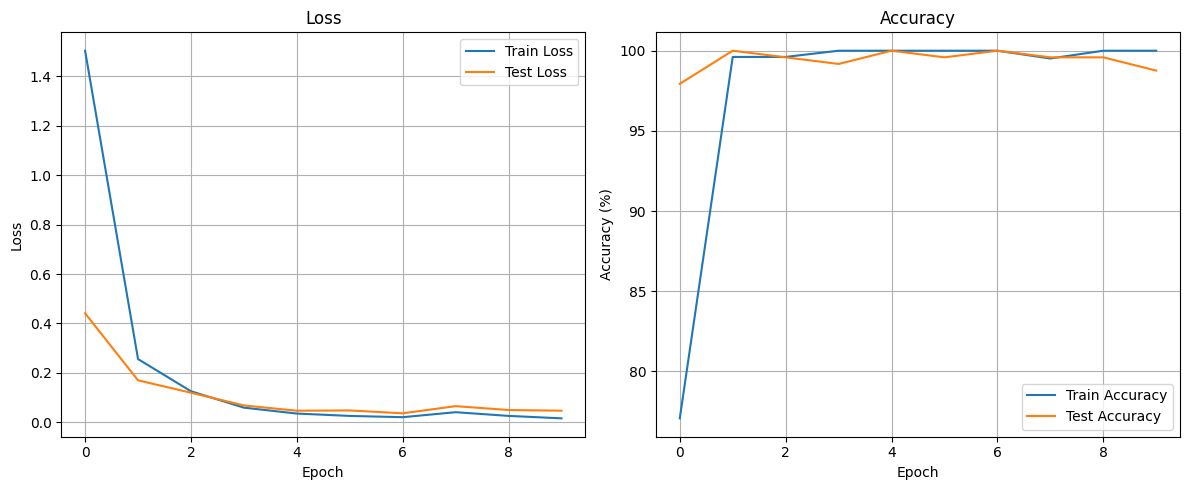

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from facenet_pytorch import InceptionResnetV1
from tqdm import tqdm
import matplotlib.pyplot as plt

# Kiểm tra GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Đường dẫn dữ liệu
data_dir = "/content/unzipped_folder/output_folder"  # Thay bằng đường dẫn của bạn

# Tham số
batch_size = 32
num_epochs = 10
learning_rate = 1e-4

# Tiền xử lý ảnh
transform = transforms.Compose([
    transforms.Resize((160, 160)),  # InceptionResnetV1 dùng ảnh 160x160
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Chuẩn hóa về [-1, 1]
])

# Load dữ liệu
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_classes = len(train_dataset.classes)
print(f"Số lớp: {num_classes} - {train_dataset.classes}")

# Khởi tạo mô hình pretrained từ VGGFace2
model = InceptionResnetV1(pretrained='vggface2', classify=True, num_classes=num_classes)
model = model.to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Theo dõi loss/accuracy
train_loss_list, test_loss_list = [], []
train_acc_list, test_acc_list = [], []

# Vòng lặp huấn luyện
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct, total = 0, 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]")
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        loop.set_postfix(loss=loss.item(), acc=100 * correct / total)

    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total
    train_loss_list.append(epoch_loss)
    train_acc_list.append(epoch_acc)

    # Đánh giá trên tập test
    model.eval()
    test_loss, correct_test, total_test = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    test_loss /= total_test
    test_acc = 100 * correct_test / total_test
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)

    print(f"Epoch {epoch+1}: Train Loss={epoch_loss:.4f}, Train Acc={epoch_acc:.2f}%, "
          f"Test Loss={test_loss:.4f}, Test Acc={test_acc:.2f}%")

# Biểu đồ kết quả
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 847.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.6 MB/s eta 0:00:00
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=dbc9c486f69647bea797ffab7b340e12f75ef4289933af44

Loaded pretrained weights for efficientnet-b0


Epoch 1/10: 100%|██████████| 38/38 [07:58<00:00, 12.60s/it]


Epoch 1: Train Loss=0.9520, Train Acc=61.89%, Test Loss=1.0366, Test Acc=52.19%


Epoch 2/10: 100%|██████████| 38/38 [07:57<00:00, 12.56s/it]


Epoch 2: Train Loss=0.7641, Train Acc=70.15%, Test Loss=0.9446, Test Acc=65.32%


Epoch 3/10: 100%|██████████| 38/38 [07:51<00:00, 12.40s/it]


Epoch 3: Train Loss=0.6581, Train Acc=70.99%, Test Loss=0.9206, Test Acc=66.33%


Epoch 4/10: 100%|██████████| 38/38 [07:44<00:00, 12.23s/it]


Epoch 4: Train Loss=0.5554, Train Acc=75.04%, Test Loss=0.9714, Test Acc=66.67%


Epoch 5/10: 100%|██████████| 38/38 [07:55<00:00, 12.52s/it]


Epoch 5: Train Loss=0.4619, Train Acc=82.29%, Test Loss=1.0543, Test Acc=66.33%


Epoch 6/10: 100%|██████████| 38/38 [07:48<00:00, 12.32s/it]


Epoch 6: Train Loss=0.3758, Train Acc=88.87%, Test Loss=1.0921, Test Acc=65.32%


Epoch 7/10: 100%|██████████| 38/38 [07:49<00:00, 12.37s/it]


Epoch 7: Train Loss=0.3086, Train Acc=93.00%, Test Loss=1.1610, Test Acc=65.66%


Epoch 8/10: 100%|██████████| 38/38 [07:47<00:00, 12.29s/it]


Epoch 8: Train Loss=0.2795, Train Acc=93.84%, Test Loss=1.2452, Test Acc=64.65%


Epoch 9/10: 100%|██████████| 38/38 [07:56<00:00, 12.54s/it]


Epoch 9: Train Loss=0.2440, Train Acc=95.95%, Test Loss=1.5031, Test Acc=64.98%


Epoch 10/10: 100%|██████████| 38/38 [07:51<00:00, 12.40s/it]


Epoch 10: Train Loss=0.2006, Train Acc=97.39%, Test Loss=1.4106, Test Acc=63.64%


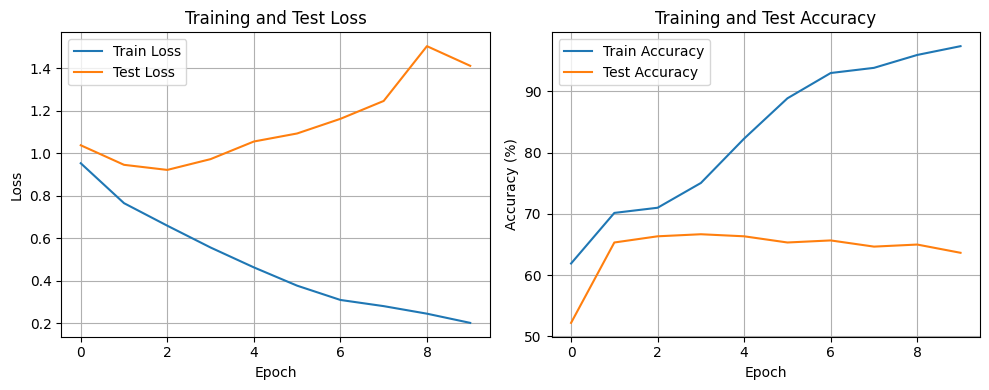

In [9]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from efficientnet_pytorch import EfficientNet
from tqdm import tqdm
import matplotlib.pyplot as plt

# Thiết bị tính toán
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ==== CẤU HÌNH ====
data_dir = '/content/coblab/output_folder'  # Đường dẫn tới tập dữ liệu
num_epochs = 10
batch_size = 32
learning_rate = 1e-4
image_size = 224

# ==== TIỀN XỬ LÝ DỮ LIỆU ====
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ==== LOAD DỮ LIỆU ====
dataset = datasets.ImageFolder(data_dir, transform=transform)
class_names = dataset.classes
num_classes = len(class_names)

# Chia tập dữ liệu thành train và test (80% train, 20% test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ==== KHỞI TẠO MÔ HÌNH ====
model = EfficientNet.from_pretrained('efficientnet-b0')
model._fc = nn.Linear(model._fc.in_features, num_classes)  # Sửa lớp cuối
model = model.to(device)

# ==== HÀM MẤT MÁT & TỐI ƯU ====
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# ==== HUẤN LUYỆN & KIỂM TRA ====
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    # Huấn luyện
    model.train()
    running_loss = 0.0
    correct = 0

    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += torch.sum(preds == labels).item()

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = 100. * correct / len(train_dataset)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    # Đánh giá trên tập kiểm tra
    model.eval()
    test_loss = 0.0
    test_correct = 0

    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * imgs.size(0)
            _, preds = torch.max(outputs, 1)
            test_correct += torch.sum(preds == labels).item()

    test_loss = test_loss / len(test_dataset)
    test_acc = 100. * test_correct / len(test_dataset)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    # In kết quả
    print(f"Epoch {epoch+1}: Train Loss={epoch_loss:.4f}, Train Acc={epoch_acc:.2f}%, "
          f"Test Loss={test_loss:.4f}, Test Acc={test_acc:.2f}%")

# ==== VẼ BIỂU ĐỒ ====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.title("Training and Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.title("Training and Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
import zipfile
import os

# Đường dẫn đến file zip
zip_path = "/content/archive (2).zip"

# Thư mục đích sau khi giải nén
extract_path = "/content/coblab"

# Tạo thư mục nếu chưa tồn tại
os.makedirs(extract_path, exist_ok=True)

# Giải nén
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Đã giải nén vào thư mục:", extract_path)


Đã giải nén vào thư mục: /content/coblab
